In [1]:
from google.colab import files
uploaded=files.upload()

Saving bankruptcy-prevention.xlsx to bankruptcy-prevention.xlsx


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Read the Excel file using pd.read_excel()
df = pd.read_excel('bankruptcy-prevention.xlsx')
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
# Display dataset details
print("Dataset Details:")
print(df.info())

Dataset Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None


In [5]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       industrial_risk   management_risk   financial_flexibility  \
count       250.000000        250.000000              250.000000   
mean          0.518000          0.614000                0.376000   
std           0.411526          0.410705                0.401583   
min           0.000000          0.000000                0.000000   
25%           0.000000          0.500000                0.000000   
50%           0.500000          0.500000                0.500000   
75%           1.000000          1.000000                0.500000   
max           1.000000          1.000000                1.000000   

        credibility   competitiveness   operating_risk  
count    250.000000        250.000000       250.000000  
mean       0.470000          0.476000         0.570000  
std        0.415682          0.440682         0.434575  
min        0.000000          0.000000         0.000000  
25%        0.000000          0.000000         0.000000  
50%        0.500000 

In [6]:
# Check for null values
print("\nNull Values:")
print(df.isnull().sum())


Null Values:
industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
     industrial_risk   management_risk   financial_flexibility   credibility  \
11               0.0               1.0                     0.0           0.0   
13               1.0               1.0                     0.0           0.0   
15               0.5               1.0                     0.0           0.0   
16               0.5               1.0                     0.0           0.0   
18               0.5               1.0                     0.0           0.0   
..               ...               ...                     ...           ...   
245              0.0               1.0                     1.0           1.0   
246              1.0               1.0                     0.5           1.0   
247              0.0               1.0                     1.0           0.5   
248              1.0               0.0                     0.5           1.0   
249              1.0               0.0                     0.5           0.5   

      competitiveness 

In [8]:
# Drop duplicate rows
df = df.drop_duplicates()
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [9]:
# Set style for Seaborn plots
sns.set(style="whitegrid")
# Remove whitespaces from column names
df.columns = df.columns.str.strip()

In [10]:
# Separate features and target variable
X = df.drop('class', axis=1)
Y = df['class']

<ipython-input-11-d812dcf69e4c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


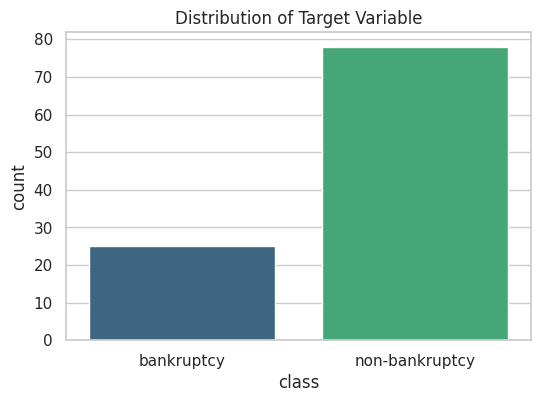

In [11]:
#--------------------------------- EDA - Explore Data-----------------------------
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Distribution of Target Variable')
plt.show()

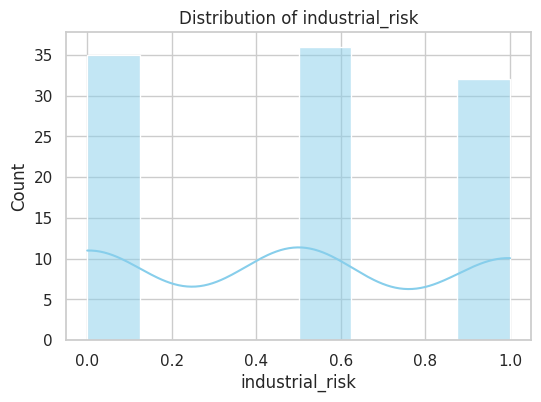

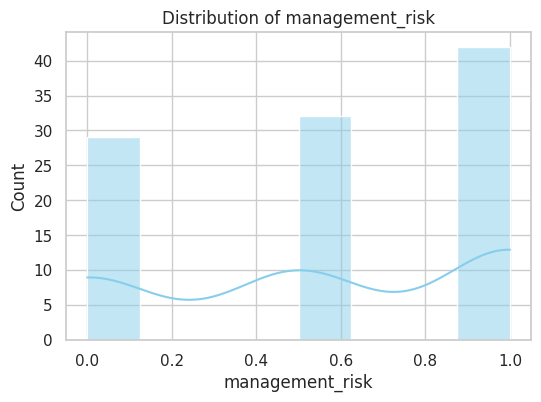

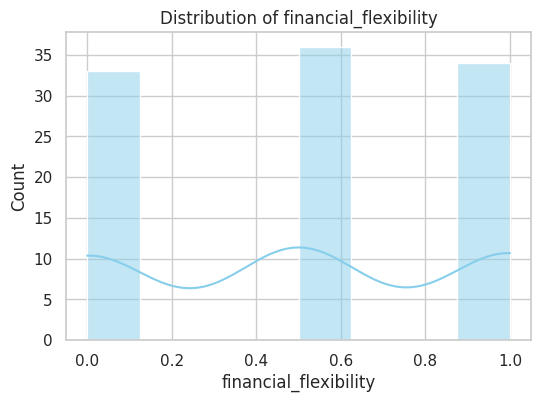

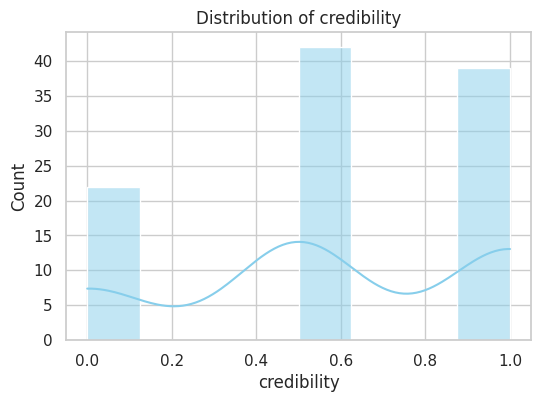

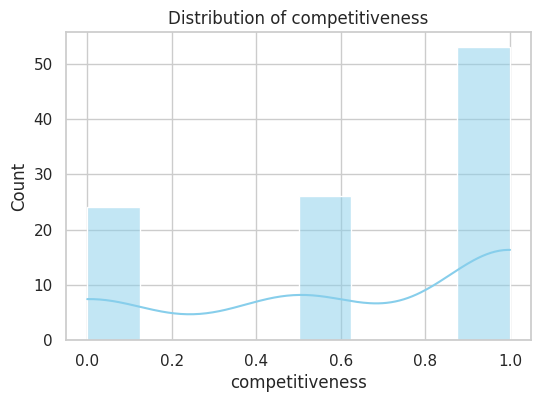

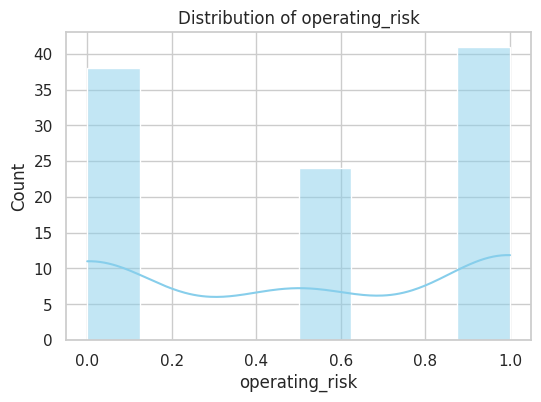

In [12]:
# Explore numerical features using histogram
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.show()

<ipython-input-13-b607b8cee334>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=df, palette='muted')


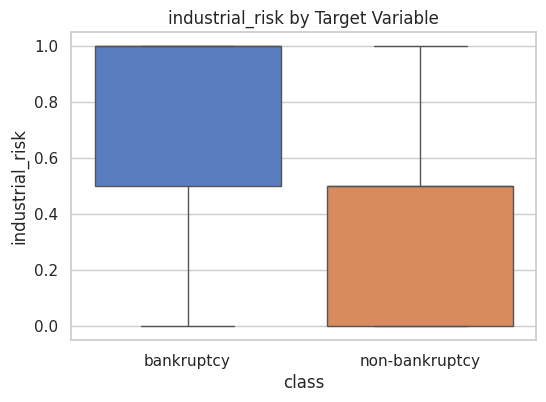

<ipython-input-13-b607b8cee334>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=df, palette='muted')


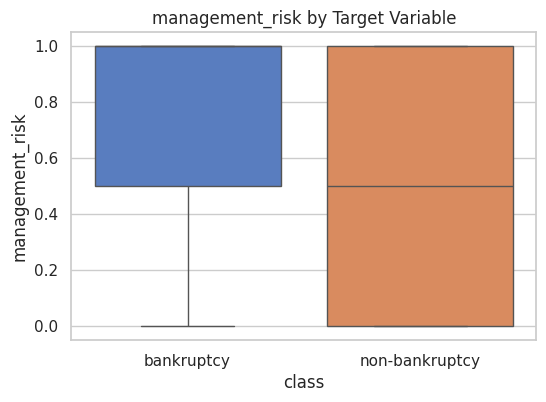

<ipython-input-13-b607b8cee334>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=df, palette='muted')


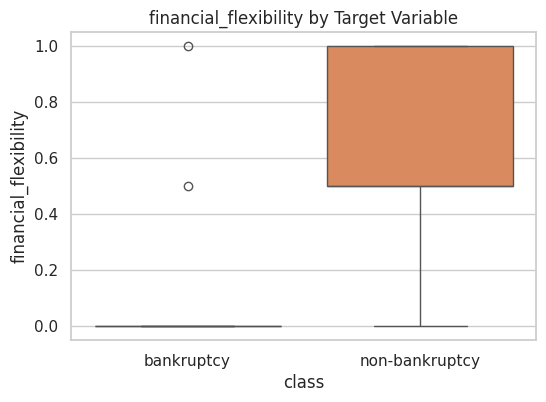

<ipython-input-13-b607b8cee334>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=df, palette='muted')


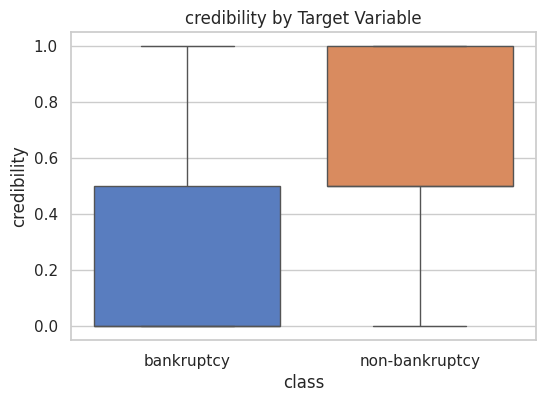

<ipython-input-13-b607b8cee334>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=df, palette='muted')


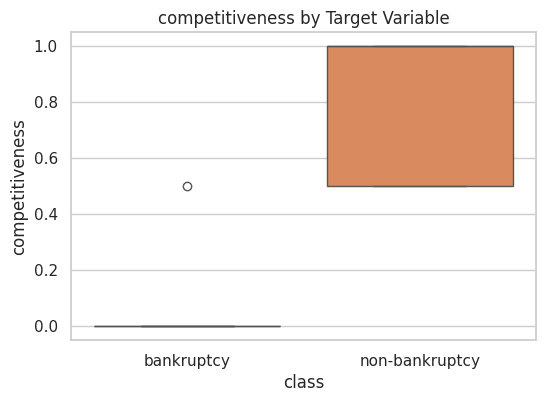

<ipython-input-13-b607b8cee334>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=df, palette='muted')


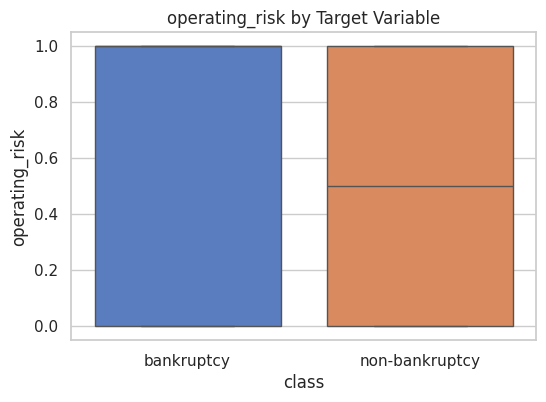

In [13]:
# Explore relationships between numerical features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=feature, data=df, palette='muted')
    plt.title(f'{feature} by Target Variable')
    plt.show()

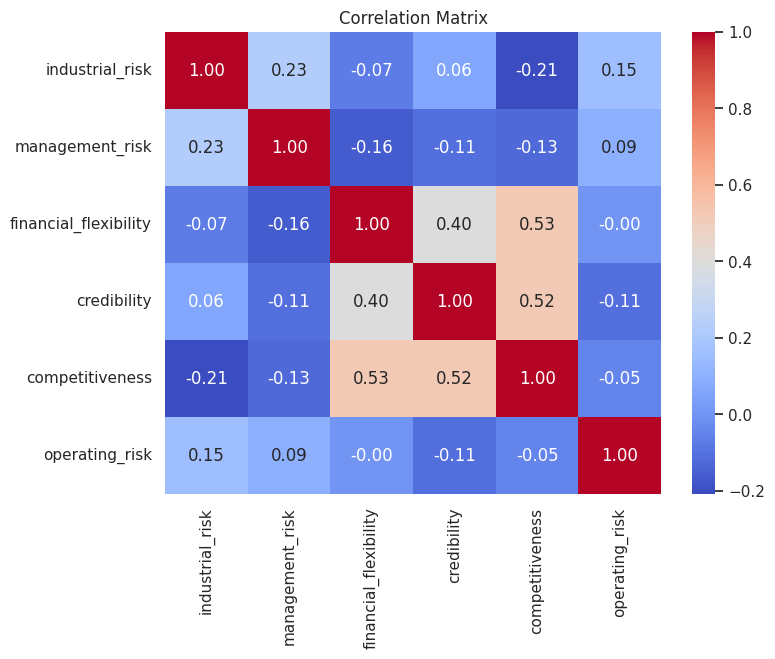

In [14]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Data Preprocessing - Scaling and Standardizing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

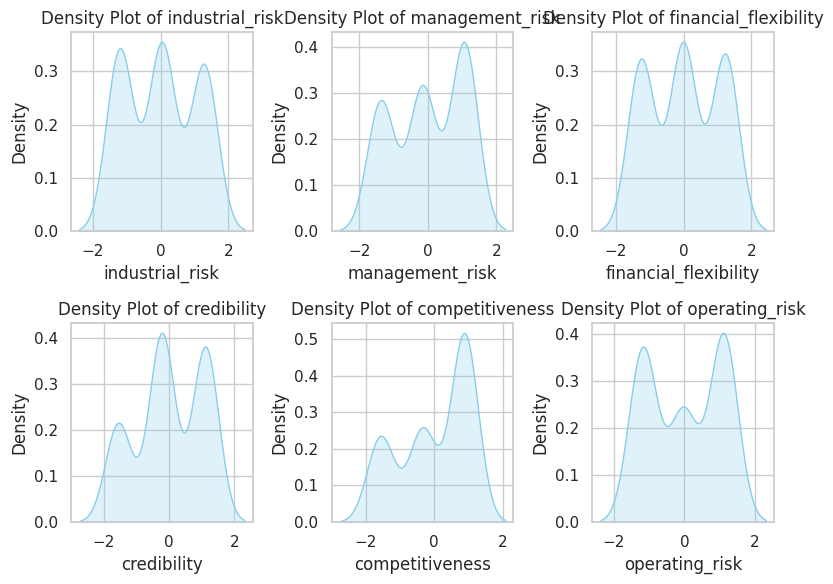

In [16]:
# Display density plots for scaled numerical features
plt.figure(figsize=(8, 6))
for i, feature in enumerate(scaled_df.columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(scaled_df[feature], color='skyblue', fill=True)
    plt.title(f'Density Plot of {feature}')
plt.tight_layout()
plt.show()

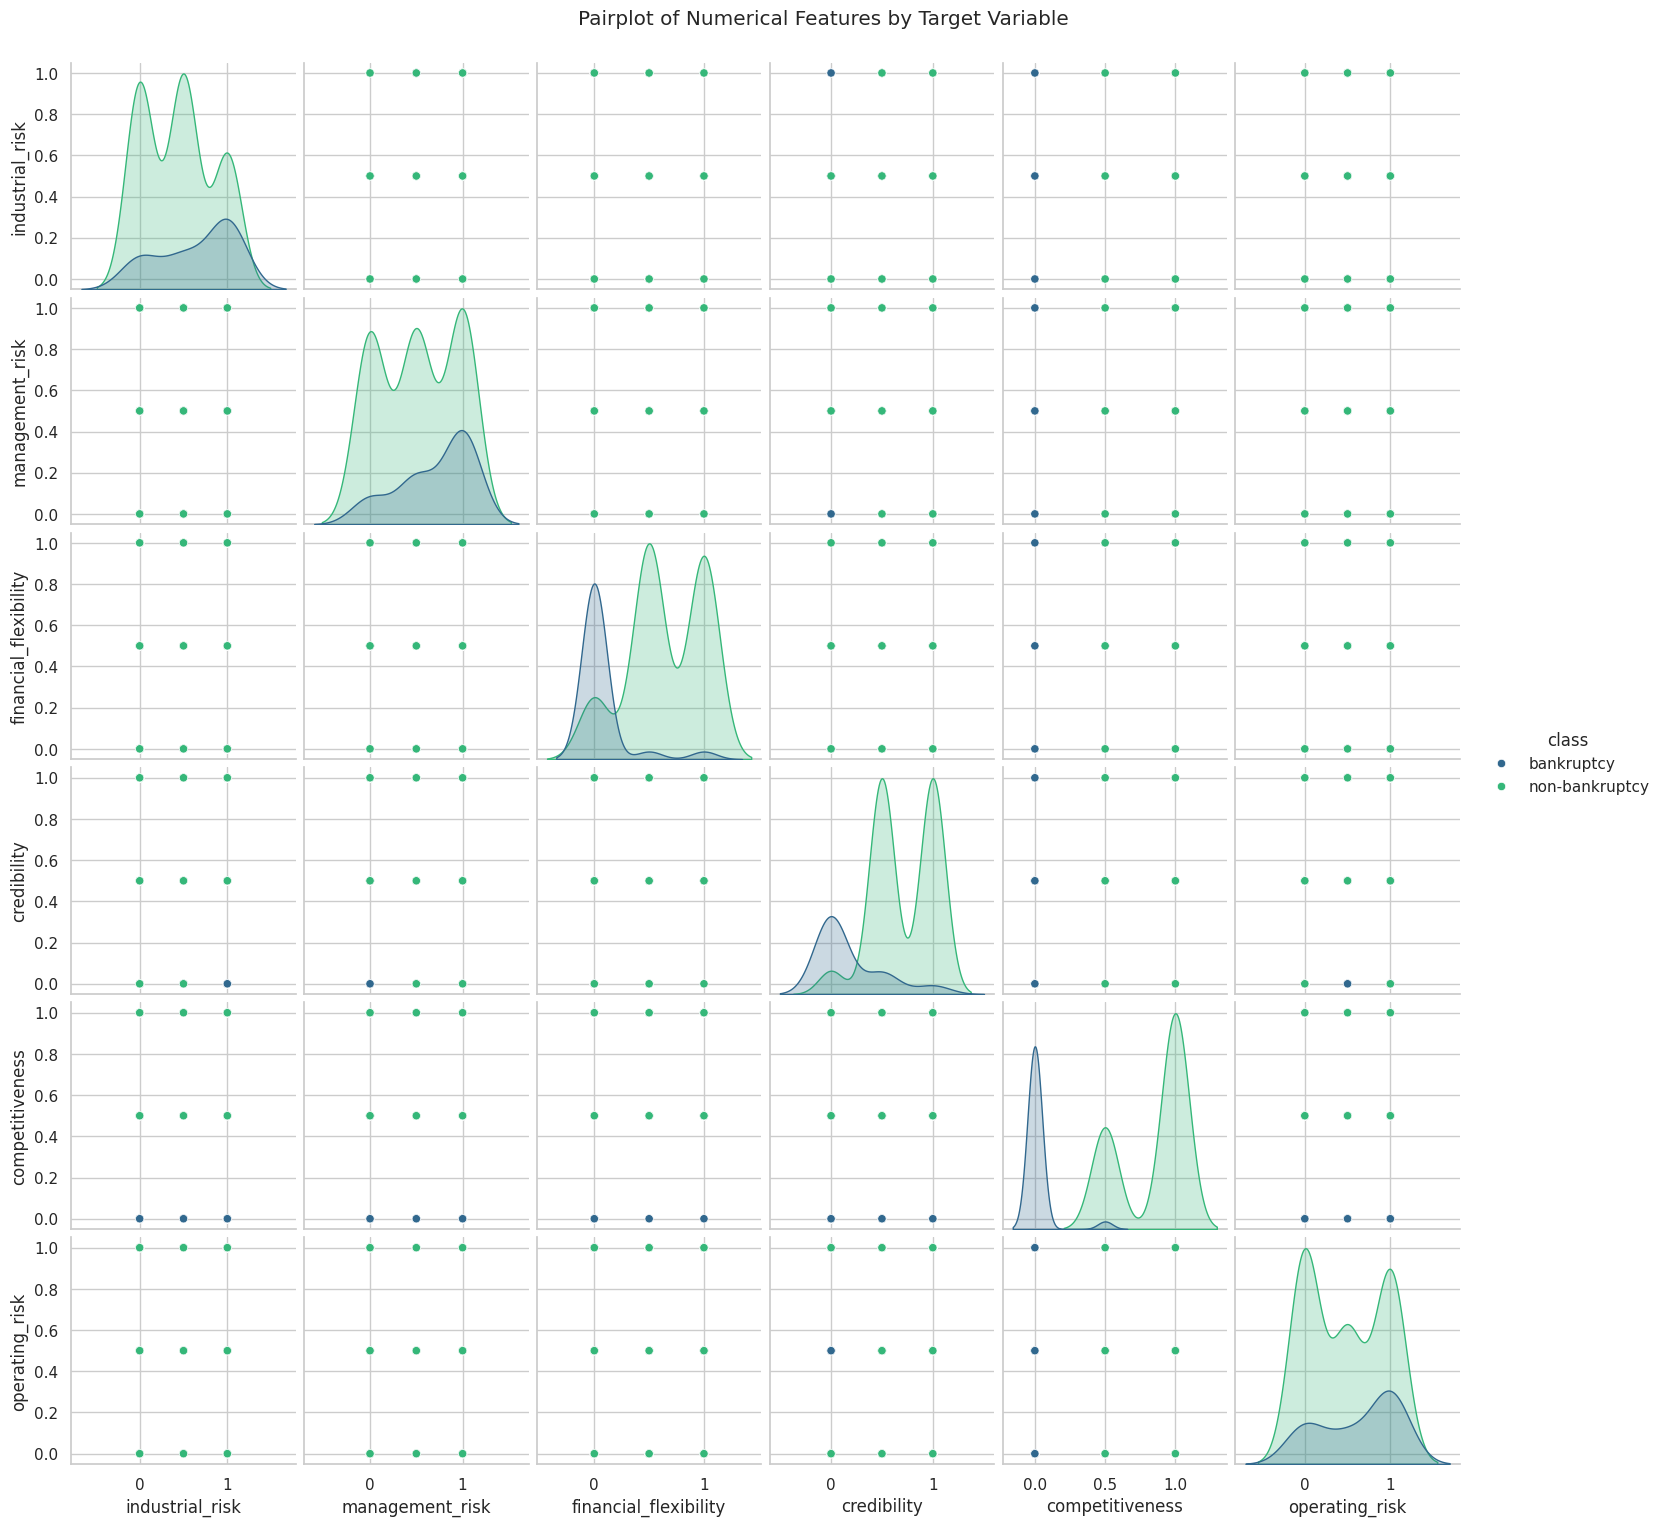

In [17]:
# Pairplot for numerical features
target_variable = 'class'
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
# Check if the target variable exists in the dataset
if target_variable not in df.columns:
    print(f"Error: Target variable '{target_variable}' not found in the dataset.")
else:
    sns.pairplot(df, hue=target_variable, palette='viridis', vars=numerical_features)
    plt.suptitle('Pairplot of Numerical Features by Target Variable', y=1.02)
    plt.show()

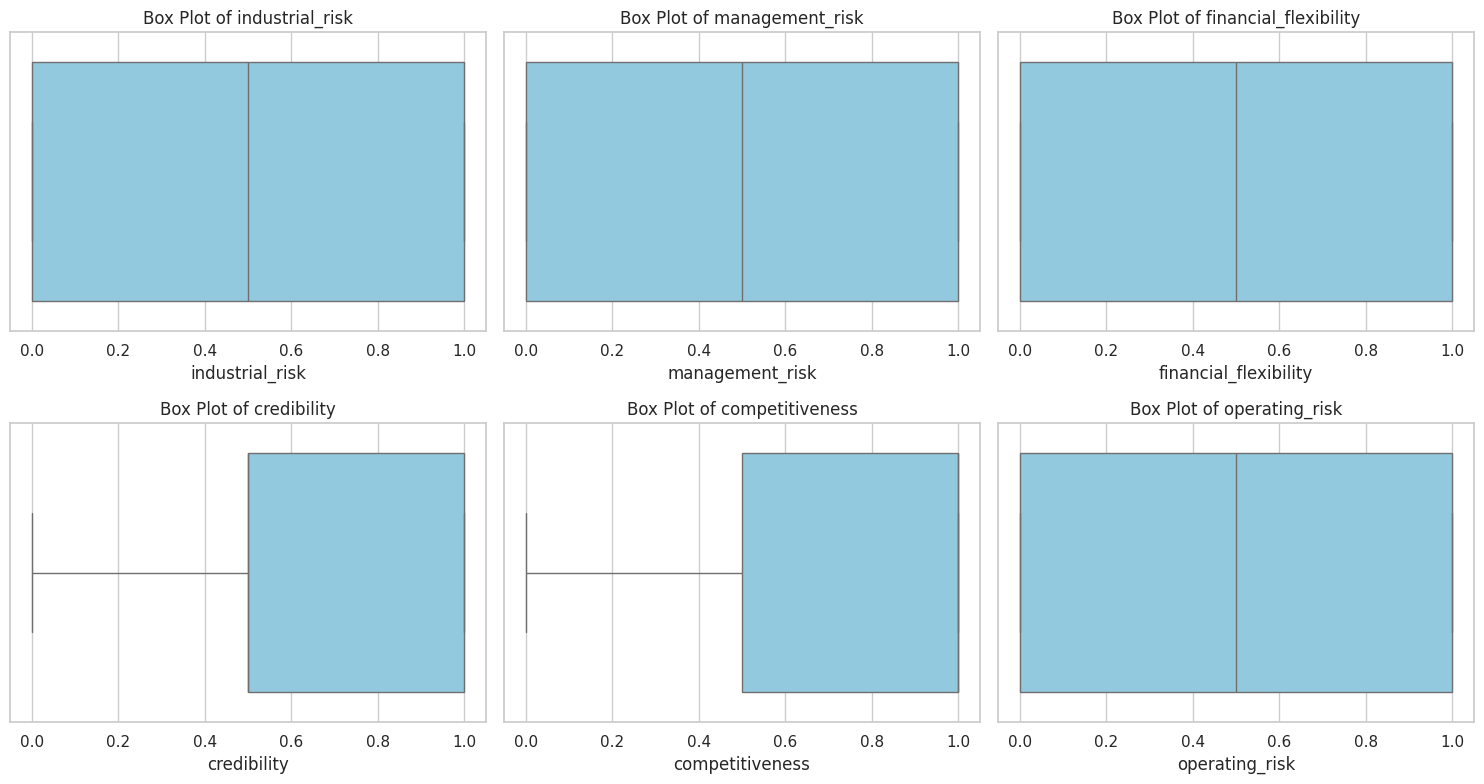

In [18]:
# Identify outliers using box plots
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [19]:
#--------------------------------- Model Buildings-----------------------------
# Encode the target variable
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')

DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy", ac1.round(3))
print("Test Accuracy", ac2.round(3))
#====================================================================
# cross validation
#====================================================================
DT = DecisionTreeClassifier(criterion='gini',max_depth=6)

training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test  = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

k1 = pd.DataFrame(training_accuracy)
k2 = pd.DataFrame(test_accuracy)
print("Cross validation training results:",k1.mean().round(2))
print("Cross validation test results:",k2.mean().round(2))

Training Accuracy 1.0
Test Accuracy 0.952
Cross validation training results: 0    1.0
dtype: float64
Cross validation test results: 0    0.98
dtype: float64


In [21]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                        n_estimators=100,
                        max_samples=0.6,
                        max_features=0.7)
training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    bag.fit(X_train,Y_train)
    Y_pred_train = bag.predict(X_train)
    Y_pred_test  = bag.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

k1 = pd.DataFrame(training_accuracy)
k2 = pd.DataFrame(test_accuracy)
print("Cross validation training results:",k1.mean().round(2))
print("Cross validation test results:",k2.mean().round(2))

Cross validation training results: 0    1.0
dtype: float64
Cross validation test results: 0    0.99
dtype: float64


In [22]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,max_depth=8,
                        max_samples=0.6,
                        max_features=0.7)
training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    RFC.fit(X_train,Y_train)
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test  = RFC.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

k1 = pd.DataFrame(training_accuracy)
k2 = pd.DataFrame(test_accuracy)
print("Cross validation training results:",k1.mean().round(2))
print("Cross validation test results:",k2.mean().round(2))

Cross validation training results: 0    1.0
dtype: float64
Cross validation test results: 0    0.99
dtype: float64


In [23]:
#   knn classifer with its accuracy
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9)

KNN.fit(X_train,Y_train)

Y_pred_train = KNN.predict(X_train)
Y_pred_test  = KNN.predict(X_test)
# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
ac_train = accuracy_score(Y_train,Y_pred_train)
ac_test = accuracy_score(Y_test,Y_pred_test)

print("Training Accuracy:", ac_train.round(2))
print("Test Accuracy:", ac_test.round(2))
# cross validation
#====================================================================
training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    KNN.fit(X_train,Y_train)
    Y_pred_train = KNN.predict(X_train)
    Y_pred_test  = KNN.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

k1 = pd.DataFrame(training_accuracy)
k2 = pd.DataFrame(test_accuracy)
print("Cross validation training results:",k1.mean().round(2))
print("Cross validation test results:",k2.mean().round(2))

Training Accuracy: 0.97
Test Accuracy: 1.0
Cross validation training results: 0    0.99
dtype: float64
Cross validation test results: 0    0.98
dtype: float64


In [24]:
# GradientBoostingClassifier
#====================================================================
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(learning_rate=0.1,
                                n_estimators=500)
training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    GBC.fit(X_train,Y_train)
    Y_pred_train = GBC.predict(X_train)
    Y_pred_test  = GBC.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

k1 = pd.DataFrame(training_accuracy)
k2 = pd.DataFrame(test_accuracy)
print("Cross validation training results:",k1.mean().round(2))
print("Cross validation test results:",k2.mean().round(2))

Cross validation training results: 0    1.0
dtype: float64
Cross validation test results: 0    0.97
dtype: float64


In [25]:
# support vector machine
from sklearn.svm import SVC
svclass = SVC(C=1.0,kernel='linear')
svclass.fit(X_train,Y_train)

Y_pred_train = svclass.predict(X_train)
Y_pred_test  = svclass.predict(X_test)

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
ac_train = accuracy_score(Y_train,Y_pred_train)
ac_test = accuracy_score(Y_test,Y_pred_test)

print("Training Accuracy:", ac_train.round(2))
print("Test Accuracy:", ac_test.round(2))
# cross validation
#====================================================================
training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    svclass.fit(X_train,Y_train)
    Y_pred_train = svclass.predict(X_train)
    Y_pred_test  = svclass.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

k1 = pd.DataFrame(training_accuracy)
k2 = pd.DataFrame(test_accuracy)
print("Cross validation training results:",k1.mean().round(2))
print("Cross validation test results:",k2.mean().round(2))

Training Accuracy: 0.97
Test Accuracy: 1.0
Cross validation training results: 0    0.99
dtype: float64
Cross validation test results: 0    0.98
dtype: float64


In [26]:
# Logistic Regrission
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,Y_train)

Y_predict_train = logr.predict(X_train)
Y_predict_test = logr.predict(X_test)
#  metrics
ac_train = accuracy_score(Y_train, Y_predict_train)
ac_test = accuracy_score(Y_test, Y_predict_test)
print("TRaining Accuracy:", ac_train.round(2))
print("Test Accuracy:", ac_test.round(2))
#  Cross Validation
training_accuracy = []
test_accuracy = []

for i in range(1,100):

    X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size= 0.30,random_state=i)
    logr.fit(X_train,Y_train)
    Y_pred_train = logr.predict(X_train)
    Y_pred_test = logr.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))
print("Cross validation trainingresults:",k1.mean().round(2))
print("Cross validation test results:",k2.mean().round(2))

TRaining Accuracy: 0.97
Test Accuracy: 1.0
Cross validation trainingresults: 0    0.99
dtype: float64
Cross validation test results: 0    0.98
dtype: float64


In [ ]:
# Deploying the Project
import pickle
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(DT, file)
